In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler , PowerTransformer
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [6]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

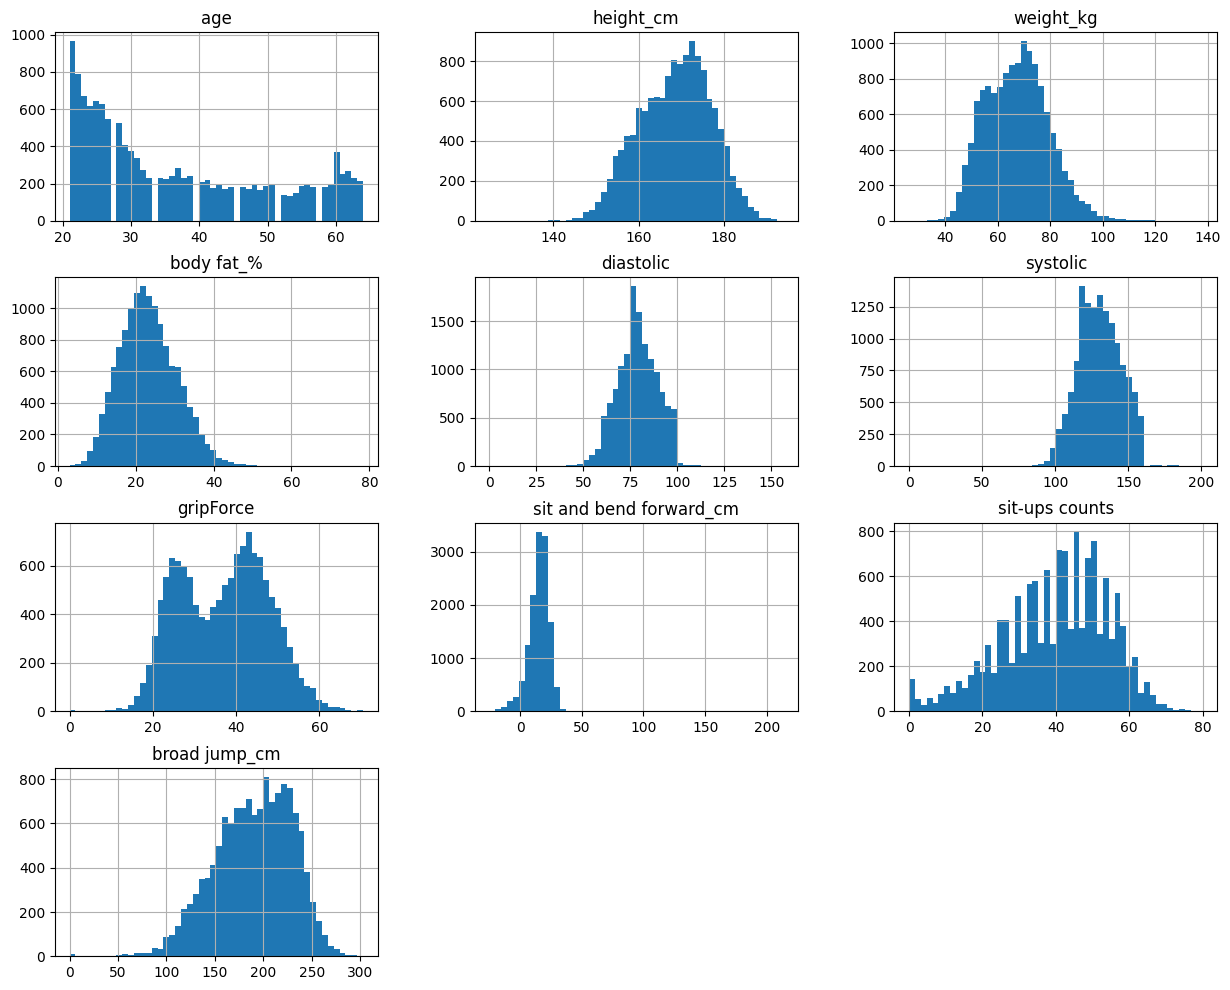

In [7]:
df.hist(bins=50 , figsize=(15,12))
plt.show()

In [8]:
df.age

0        27.0
1        25.0
2        31.0
3        32.0
4        28.0
         ... 
13388    25.0
13389    21.0
13390    39.0
13391    64.0
13392    34.0
Name: age, Length: 13393, dtype: float64

In [9]:
df.gender.value_counts() 

M    8467
F    4926
Name: gender, dtype: int64

In [10]:
gender = {'M' :1,   
            'F':0}

df.gender.replace(gender,inplace=True)
df.gender

0        1
1        1
2        1
3        1
4        1
        ..
13388    1
13389    1
13390    1
13391    0
13392    1
Name: gender, Length: 13393, dtype: int64

In [11]:
df.gender.value_counts()

1    8467
0    4926
Name: gender, dtype: int64

In [12]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [13]:
df['class'].value_counts()


C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [14]:
classes = {"A":0,"B":1,"C":2,"D":3}
df['class'].replace(classes,inplace = True)

In [15]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [16]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


<AxesSubplot: xlabel='height_cm'>

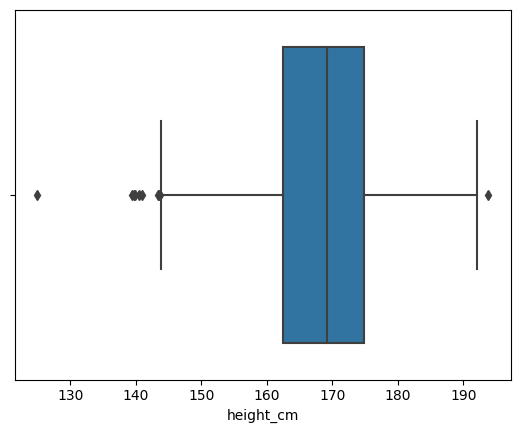

In [18]:
sns.boxplot(x=df['height_cm'])

<AxesSubplot: xlabel='weight_kg'>

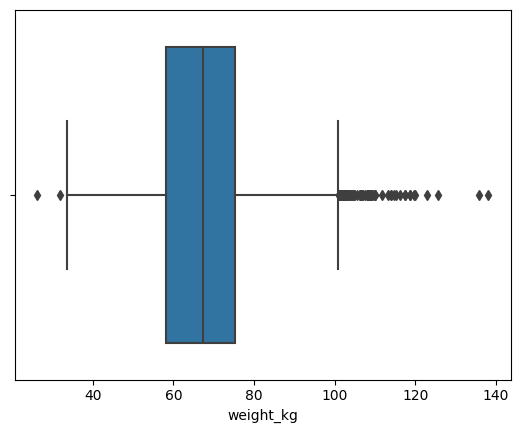

In [19]:
sns.boxplot(x=df['weight_kg'])

<AxesSubplot: xlabel='body fat_%'>

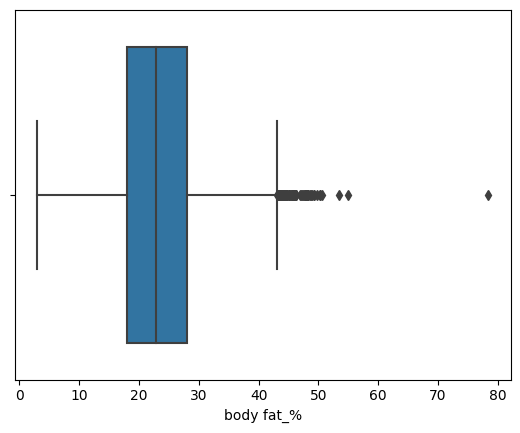

In [20]:
sns.boxplot(x=df['body fat_%'])

<AxesSubplot: >

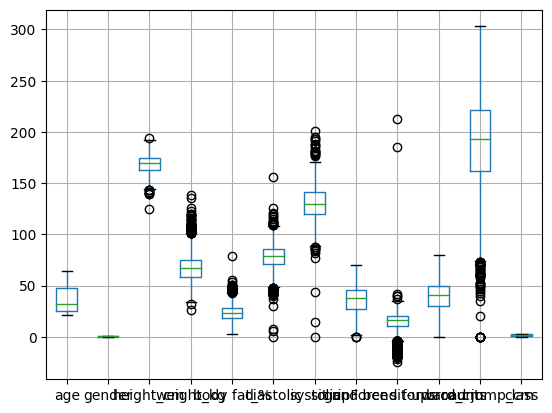

In [21]:
df.boxplot()

In [22]:
from scipy.stats import zscore

In [23]:
def outlier(feature):
    mean = np.mean(feature)
    std = np.std(feature)
    
    print(f'Mean od The Feature : {mean}')
    print(f'Standard deviation of Feature : {std}')
    
    z_score = zscore(feature)
    outlier_index_list = np.where(np.abs(z_score)>3)
    outlier_list = feature[outlier_index_list[0]]
    return outlier_list
    

In [24]:
outlier(df['age'])

Mean od The Feature : 36.77510639886508
Standard deviation of Feature : 13.625130780681168


Series([], Name: age, dtype: float64)

In [25]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [26]:
outlier(df['height_cm'])

Mean od The Feature : 168.5598073620548
Standard deviation of Feature : 8.426267955628152


2235     139.8
2758     141.0
6057     139.9
6882     139.5
8251     125.0
11237    140.5
Name: height_cm, dtype: float64

In [27]:
len(outlier(df['weight_kg']))

Mean od The Feature : 67.4473157619652
Standard deviation of Feature : 11.949220218261463


57

In [28]:
outlier(df['body fat_%'])

Mean od The Feature : 23.240164950869858
Standard deviation of Feature : 7.256573155583433


582      47.1
718      45.8
735      78.4
1400     53.5
1593     47.7
2059     45.1
2186     46.2
2211     46.1
2630     48.3
2795     45.5
3007     48.7
3087     47.5
3488     47.7
3642     48.9
3791     45.9
4082     49.3
4694     46.1
4838     46.9
5391     48.2
5423     47.3
5533     48.6
5622     45.7
5904     46.0
6163     45.4
6474     49.8
6672     47.4
7379     46.0
7539     48.0
8599     50.3
9178     50.6
9323     47.9
10000    46.3
10203    50.2
10299    45.5
10430    45.1
10440    49.2
10608    48.1
10649    47.9
11487    46.1
11529    54.9
12116    45.6
12884    48.3
12930    45.3
Name: body fat_%, dtype: float64